In [ ]:
# Import libraries
import graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

# Load the data from the Excel file
churn = pd.read_excel("Telco_Customer_Churn.xlsx")

#EDA

Let's first take a look at our data.

In [ ]:
# Print out first few rows of raw data
churn.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Print out column names
print(churn.columns)

# Print out number of observations
print(len(churn.index))

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
7043


There are 7043 observations containing information of the customer. From these attributes we will predict whether they are likely to churn or not.

In [ ]:
# Statistics for `Gender` variable: gender of subject
churn["Gender"].describe()

count     7043
unique       2
top       Male
freq      3555
Name: Gender, dtype: object

In [ ]:
# Statistics for `SeniorCitizen` variable: subject's status as a senior citizen
churn["SeniorCitizen"].describe()

count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64

In [ ]:
# Statistics for `Partner` variable: subject's relationship status
churn["Partner"].describe()

count     7043
unique       2
top         No
freq      3641
Name: Partner, dtype: object

We will take a closer look at a few groups' churn patterns.

In [ ]:
# Checking the churn counts for each gender
eda_gender = churn[["Gender", "Churn"]]
df_gender = eda_gender.groupby("Gender").value_counts()
print(df_gender)

print("\nNumber of Females:", (df_gender[0] + df_gender[1]))
print("Number of Males:", (df_gender[2] + df_gender[3]), "\n")

print("Percent of Females Churned:", df_gender[1] / (df_gender[0] + df_gender[1]))
print("Percent of Males Churned:", df_gender[3] / (df_gender[2] + df_gender[3]))


Gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
dtype: int64

Number of Females: 3488
Number of Males: 3555 

Percent of Females Churned: 0.26920871559633025
Percent of Males Churned: 0.2616033755274262


From this, we can see that there  roughly the same number of male and female customers are in the data, and males churned at the roughly the same rate as females churned.

In [ ]:
# Checking the churn counts by senior citizen status
eda_senior = churn[["SeniorCitizen", "Churn"]]
df_senior = eda_senior.groupby("SeniorCitizen").value_counts()
print(df_senior)

print("\nNumber of Non-Senior Citizens:", (df_senior.iloc[0] + df_senior.iloc[1]))
print("Number of Senior Citizens:", (df_senior.iloc[2] + df_senior.iloc[3]), "\n")

print("Percent of Non-Senior Citizens Churned:", df_senior.iloc[1] / (df_senior.iloc[0] + df_senior.iloc[1]))
print("Percent of Senior Citizens Churned:", df_senior.iloc[3] / (df_senior.iloc[2] + df_senior.iloc[3]))

SeniorCitizen  Churn
0              No       4508
               Yes      1393
1              No        666
               Yes       476
dtype: int64

Number of Non-Senior Citizens: 5901
Number of Senior Citizens: 1142 

Percent of Non-Senior Citizens Churned: 0.23606168446026096
Percent of Senior Citizens Churned: 0.4168126094570928


From this, we can see that there are fewer senior citizen customers in the data than non-senior citizens. We also see that senior citizens churned more frequently than non-senior citizens.

In [ ]:
# Checking the churn counts by marriage/partner status
eda_partner = churn[["Partner", "Churn"]]
df_partner = eda_partner.groupby("Partner").value_counts()
print(df_partner)

print("\nNumber of Non-Partnered:", (df_partner[0] + df_partner[1]))
print("Number of Partnered:", (df_partner[2] + df_partner[3]), "\n")

print("Percent of Non-Partnered Churned:", df_partner[1] / (df_partner[0] + df_partner[1]))
print("Percent of Partnered Churned:", df_partner[3] / (df_partner[2] + df_partner[3]))

Partner  Churn
No       No       2441
         Yes      1200
Yes      No       2733
         Yes       669
dtype: int64

Number of Non-Partnered: 3641
Number of Partnered: 3402 

Percent of Non-Partnered Churned: 0.32957978577313923
Percent of Partnered Churned: 0.1966490299823633


Here we can see that there are more customers without partners than with, and customers without partners churned more frequently than customers with partners.

In [ ]:
# Checking churn counts for the entire dataset 
eda = churn[["Churn"]]
df = eda.value_counts()
print(df)

print("\nPercent Churned:", df[1] / (df[0] + df[1]))


Churn
No       5174
Yes      1869
dtype: int64

Percent Churned: 0.2653698707936959


In the entire dataset, 26.5% of the customers churned.

# Data Wrangling
If you take a look at the data, notice that the majority of the columns contain string and float datatype. The string datatypes are problematic for our model. Most models perform best when the values are integers or float, because it reduces room for misinterpretations.

Let's take a look at all the unique values within each attribute. Doing this allows us to decide how to convert the values to binary encoding.

In [ ]:
# Loop over each column printing unique values
for col in churn.columns:
  # Print out unique values for this column
  print(col, churn[col].unique())

CustomerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
Tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [ ]:
# Converting the Contract column to binary values
churn["Month-to-month"] = (churn["Contract"] == "Month-to-month").astype(int)
churn["One year"] = (churn["Contract"] == "One year").astype(int)
churn["Two year"] = (churn["Contract"] == "Two year").astype(int)
churn.drop("Contract", axis = 1, inplace=True)

# Converting the PaymentMethod column to binary values
churn["Electronic check"] = (churn["PaymentMethod"] == "Electronic check").astype(int)
churn["Mailed check"] = (churn["PaymentMethod"] == "Mailed check").astype(int)
churn["Bank transfer (automatic)"] = (churn["PaymentMethod"] == "Bank transfer (automatic)").astype(int)
churn["Credit card (automatic)"] = (churn["PaymentMethod"] == "Credit card (automatic)").astype(int)
churn.drop("PaymentMethod", axis = 1, inplace=True)

In [ ]:
# Change "yes" and "no" to 1 and 0
churn["Partner"] = churn["Partner"].map({"Yes": 1, "No": 0})
churn["Dependents"] = churn["Dependents"].map({"Yes": 1, "No": 0})
churn["PhoneService"] = churn["PhoneService"].map({"Yes": 1, "No": 0, "No phone service": 0})
churn["MultipleLines"] = churn["MultipleLines"].map({"Yes": 1, "No": 0, "No phone service": 0})
churn["OnlineSecurity"] = churn["OnlineSecurity"].map({"Yes": 1, "No": 0, "No internet service": 0})
churn["OnlineBackup"] = churn["OnlineBackup"].map({"Yes": 1, "No": 0, "No internet service": 0})
churn["DeviceProtection"] = churn["DeviceProtection"].map({"Yes": 1, "No": 0, "No internet service": 0})
churn["TechSupport"] = churn["TechSupport"].map({"Yes": 1, "No": 0, "No internet service": 0})
churn["StreamingTV"] = churn["StreamingTV"].map({"Yes": 1, "No": 0, "No internet service": 0})
churn["StreamingMovies"] = churn["StreamingMovies"].map({"Yes": 1, "No": 0, "No internet service": 0})
churn["PaperlessBilling"] = churn["PaperlessBilling"].map({"Yes": 1, "No": 0})
churn["Churn"] = churn["Churn"].map({"Yes": 1, "No": 0})

# Change "Male" to 0, "Female" to 1
churn["Gender"] = churn["Gender"].map({"Female": 1, "Male": 0})

In [ ]:
# Remove `InternetService` variable
churn.drop("InternetService", axis = 1, inplace=True)

# Changing order and names of variables
churn.columns = [
    "custid",
    "gender",
    "senior",
    "partner",
    "dependents",
    "tenure",
    "phone",
    "lines",
    "security",
    "backup",
    "protection",
    "support",
    "tv",
    "movies",
    "paperless",
    "monthly",
    "total",
    "churn",
    "is_monthly",
    "is_yearly",
    "is_biannual",
    "electric_check",
    "mail_check",
    "autotransfer",
    "autocredit"
]

# Put `churn` response variable at the end of the Pandas
churn["churn"] = churn.pop("churn")

# Remove nonnumeric total values
churn = churn[pd.to_numeric(churn["total"], errors="coerce").notnull()]

In [ ]:
# Print out first few rows of cleaned data
churn.head()

,custid,gender,senior,partner,dependents,tenure,phone,lines,security,backup,...,monthly,total,is_monthly,is_yearly,is_biannual,electric_check,mail_check,autotransfer,autocredit,churn
0,7590-VHVEG,1,0,1,0,1,0,0,0,1,...,29.85,29.85,1,0,0,1,0,0,0,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,0,...,56.95,1889.5,0,1,0,0,1,0,0,0
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,53.85,108.15,1,0,0,0,1,0,0,1
3,7795-CFOCW,0,0,0,0,45,0,0,1,0,...,42.30,1840.75,0,1,0,0,0,1,0,0
4,9237-HQITU,1,0,0,0,2,1,0,0,0,...,70.70,151.65,1,0,0,1,0,0,0,1


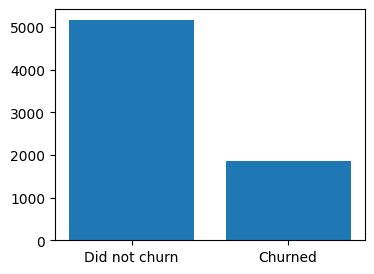

In [ ]:
# Set figure size to 4:3 ratio (the aspect ratio of a PowerPoint slide)
plt.figure(figsize=(4, 3))

# Group the data by those who churned versus those who didn't
plt.bar(["Did not churn", "Churned"], churn.groupby("churn")["churn"].count())

# Save figure in high resolution for PowerPoint
plt.savefig("graph.png", dpi=1000)

# Decision Tree

First, the dataset is split into training data and testing data using the `train_test_split` function. The training data is stored in `X_train` and `y_train`, while the testing data is stored in `X_test` and `y_test`.

In [ ]:
# Create our feature matrix using the first 24 variables
X = churn.iloc[:, 1:24].astype(float)

# Create our response vector using the last variable, `churn`
y = churn["churn"].astype(float)

# Split our dataset into training data versus testing data
X_train, X_test, y_train, y_test = train_test_split(X, y)

Secondly, we construct a decision tree classifier to model a binary classification problem. The decision tree is created with an empty structure using the `DecisionTreeClassifier()` function from the `tree` module. The decision tree is then pruned to prevent overfitting and improve generalization using the cost-complexity pruning method. The tuning parameters of the pruned tree, effective alphas (`ccp_alphas`) and impurities (`impurities`), are calculated using the `cost_complexity_pruning_path()` function applied on the training dataset.






In [ ]:
# Create an empty decision tree classifier
clf = tree.DecisionTreeClassifier()

# Prune decision tree to remove unecessary branches
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Get our tuning parameters using the above pruning algorithm
ccp_alphas = path.ccp_alphas
impurities = path.impurities

Thirdly, we loop over each value of `ccp_alpha` and create a decision tree classifier. In doing so, we create a sequence of decision trees with increasing levels of pruning, representing a tradeoff between model complexity and accuracy.

In [ ]:
# Create an empty list to store decision trees
clfs = []

# Loop over each tuning parameter and create a tree using that parameter
for ccp_alpha in ccp_alphas:
  # Create a decision tree using our ccp_alpha tuning parameter
  clf = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha)

  # Fit our decision tree to our data
  clf.fit(X_train, y_train)

  # Add our decision tree to our list of decision trees
  clfs.append(clf)

[Text(0.375, 0.9, 'is_monthly <= 0.5\ngini = 0.392\nsamples = 5274\nvalue = [3860, 1414]\nclass = Yes'),
 Text(0.25, 0.7, 'gini = 0.13\nsamples = 2353\nvalue = [2189, 164]\nclass = Yes'),
 Text(0.5, 0.7, 'monthly <= 69.525\ngini = 0.49\nsamples = 2921\nvalue = [1671, 1250]\nclass = Yes'),
 Text(0.25, 0.5, 'tenure <= 3.5\ngini = 0.415\nsamples = 1291\nvalue = [912, 379]\nclass = Yes'),
 Text(0.125, 0.3, 'gini = 0.497\nsamples = 462\nvalue = [249, 213]\nclass = Yes'),
 Text(0.375, 0.3, 'gini = 0.32\nsamples = 829\nvalue = [663, 166]\nclass = Yes'),
 Text(0.75, 0.5, 'tenure <= 15.5\ngini = 0.498\nsamples = 1630\nvalue = [759, 871]\nclass = No'),
 Text(0.625, 0.3, 'total <= 118.1\ngini = 0.43\nsamples = 765\nvalue = [239, 526]\nclass = No'),
 Text(0.5, 0.1, 'gini = 0.207\nsamples = 162\nvalue = [19, 143]\nclass = No'),
 Text(0.75, 0.1, 'gini = 0.463\nsamples = 603\nvalue = [220, 383]\nclass = No'),
 Text(0.875, 0.3, 'gini = 0.48\nsamples = 865\nvalue = [520, 345]\nclass = Yes')]

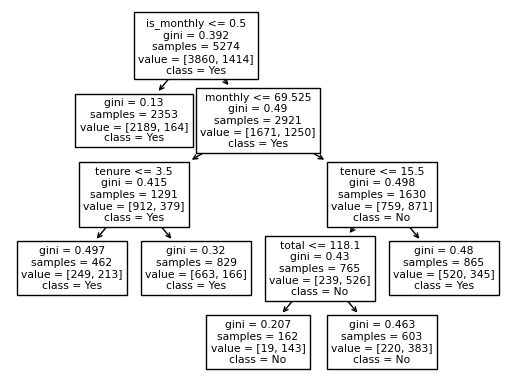

In [ ]:
# Print out a relatively simple decision tree with moderate-to-good accuracy
tree.plot_tree(clfs[-6], feature_names=X.columns, class_names=["Yes", "No"])

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

We will take a look at two case to understand the importance of selecting attributes. The first case is using all attributes and selecting specific attributes.

In [ ]:
churn.corr()

<ipython-input-20-9f285b74dfe6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  churn.corr()


,gender,senior,partner,dependents,tenure,phone,lines,security,backup,protection,...,paperless,monthly,is_monthly,is_yearly,is_biannual,electric_check,mail_check,autotransfer,autocredit,churn
gender,1.000000,0.001819,0.001379,-0.010349,-0.005285,0.007515,0.008883,0.016328,0.013093,0.000807,...,0.011902,0.013779,0.003251,-0.007755,0.003603,-0.000844,-0.013199,0.015973,-0.001632,0.008545
senior,0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,-0.038576,0.066663,0.059514,...,0.156258,0.219874,0.137752,-0.046491,-0.116205,0.171322,-0.152987,-0.016235,-0.024359,0.150541
partner,0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.143346,0.141849,0.153556,...,-0.013957,0.097825,-0.280202,0.083067,0.247334,-0.083207,-0.096948,0.111406,0.082327,-0.149982
dependents,-0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,0.080786,0.023639,0.013900,...,-0.110131,-0.112343,-0.229715,0.069222,0.201699,-0.149274,0.056448,0.052369,0.061134,-0.163128
tenure,-0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.328297,0.361138,0.361520,...,0.004823,0.246862,-0.649346,0.202338,0.563801,-0.210197,-0.232181,0.243822,0.232800,-0.354049
phone,0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,-0.091676,-0.052133,-0.070076,...,0.016696,0.248033,-0.001243,-0.003142,0.004442,0.002747,-0.004463,0.008271,-0.006916,0.011691
lines,0.008883,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.098592,0.202228,0.201733,...,0.163746,0.490912,-0.088558,-0.003594,0.106618,0.083583,-0.227672,0.075429,0.060319,0.040033
security,0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,1.000000,0.283285,0.274875,...,-0.004051,0.296447,-0.246844,0.100658,0.191698,-0.112295,-0.079918,0.094366,0.115473,-0.171270
backup,0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,0.283285,1.000000,0.303058,...,0.127056,0.441529,-0.164393,0.084113,0.111391,-0.000364,-0.174075,0.086942,0.090455,-0.082307
protection,0.000807,0.059514,0.153556,0.013900,0.361520,-0.070076,0.201733,0.274875,0.303058,1.000000,...,0.104079,0.482607,-0.225988,0.102911,0.165248,-0.003308,-0.187325,0.083047,0.111252,-0.066193


In [ ]:
X.corrwith(y).sort_values()

tenure           -0.354049
is_biannual      -0.301552
total            -0.199484
is_yearly        -0.178225
security         -0.171270
support          -0.164716
dependents       -0.163128
partner          -0.149982
autocredit       -0.134687
autotransfer     -0.118136
mail_check       -0.090773
backup           -0.082307
protection       -0.066193
gender            0.008545
phone             0.011691
lines             0.040033
movies            0.060860
tv                0.063254
senior            0.150541
paperless         0.191454
monthly           0.192858
electric_check    0.301455
is_monthly        0.404565
dtype: float64

We can see the attributes "is_monthly","tenure","is_biannual", "electric_check" have the highest correlation to churn outcomes.

We will start with the first case. We will perform a logistic regression alogrithm over all attributes. 

In [ ]:
logReg = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred = logReg.predict(X_test)

In [ ]:
precision, recall, fscore, _ =  precision_recall_fscore_support(y_test, y_pred, average = 'binary')

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy

0.8094425483503982

In [ ]:
precision

0.6415094339622641

In [ ]:
recall

0.5978021978021978

In [ ]:
fscore

0.6188850967007964

For the second case, we will select the top four correlated attributes. 

In [ ]:
X_prime = X[['tenure', 'is_biannual', 'is_monthly', 'electric_check']]


In [ ]:
X_prime.head()

,tenure,is_biannual,is_monthly,electric_check
0,1.0,0.0,1.0,1.0
1,34.0,0.0,0.0,0.0
2,2.0,0.0,1.0,0.0
3,45.0,0.0,0.0,0.0
4,2.0,0.0,1.0,1.0


In [ ]:
X_prime_train, X_prime_test, y_prime_train, y_prime_test = train_test_split(X_prime, y)

In [ ]:
X_prime_train.shape

(5274, 4)

In [ ]:
logRegPrime = LogisticRegression().fit(X_prime_train, y_prime_train)

In [ ]:
y_prime_pred = logRegPrime.predict(X_prime_test)

In [ ]:
precision_p, recall_p, fscore_p, _ =  precision_recall_fscore_support(y_test, y_prime_pred, average = 'binary')

In [ ]:
accuracy_p = accuracy_score(y_test, y_prime_pred)

In [ ]:
accuracy_p

0.661547212741752

In [ ]:
print("precision: {} , recall: {} , fscore: {}".format(precision_p,recall_p, fscore_p ))

precision: 0.279874213836478 , recall: 0.1956043956043956 , fscore: 0.23027166882276842


You would assume that extracting the most highly-correlated attributes would result in a higher metric score; however, our results show that this is not always the case. 